![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/img/Logo-BTS.jpg?raw=1)

# Session 7: Geospatial Analysis with Python

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/07_Geospatial_Analysis_with_Python.ipynb)

**Resources:**

* [GeoPandas](http://geopandas.org/)
* [Fiona](https://github.com/Toblerity/Fiona)
* [Rasterio](https://github.com/mapbox/rasterio)
* [Shapely](https://github.com/Toblerity/Shapely)
* [A Gentle Introduction to GIS](https://docs.qgis.org/3.4/en/docs/gentle_gis_introduction/index.html)

# Geospatial analysis

Geospatial analysis is the gathering, display, and manipulation of imagery, GPS, satellite photography and historical data, described explicitly in terms of geographic coordinates or implicitly, in terms of a street address, postal code, or forest stand identifier as they are applied to geographic models. Geospatial analysis can be found in almost every industry, including real estate, oil and gas, agriculture, defense, politics, health, transportation, and oceanography.

# Geographic information systems (GIS)

There are now dozens of **graphical user interface (GUI)** geospatial desktop applications available today from companies including Esri, ERDAS, Intergraph, and ENVI, to name a few. Esri is the oldest, continuously operating GIS software company, which started in the late 1960s. In the open source realm, packages including [QGIS](https://qgis.org) and [GRASS](https://grass.osgeo.org) are widely used. Beyond comprehensive desktop software packages, software libraries for the building of new software exist in the thousands.

# Geospatial analysis and computer programming

Modern geospatial analysis can be conducted with the click of a button in any of the easy-to-use commercial or open source geospatial packages. So then, why would you want to use a programming language to learn this field? The most important reasons are as follows:

* You want complete control of the underlying algorithms, data, and execution
* You want to automate specific, repetitive analysis tasks with minimal overhead from a large, multipurpose geospatial framework
* You want to create a program that's easy to share
* You want to learn geospatial analysis beyond pushing buttons in software

The geospatial industry is gradually **moving away** from the traditional workflow in which teams of analysts use expensive desktop software to produce geospatial products. Geospatial analysis is being pushed towards automated processes that reside in the cloud. End user software is moving towards task-specific tools, many of which are accessed from mobile devices. Knowledge of geospatial concepts and data as well as the ability to build custom geospatial processes is where the geospatial work in the near future lies.

# Data Models for GIS

In order to visualize natural phenomena, one must first determine how to best represent geographic space. Data models are a set of rules and/or constructs used to describe and represent aspects of the real world in a computer. Two primary data models are available to complete this task: **raster data models** and **vector data
models**.

## Vector data

**Vector** data provide a way to represent real world **features** within the GIS environment. A feature is anything you can see on the landscape. Imagine you are standing on the top of a hill. Looking down you can see houses, roads, trees, rivers, and so on. Each one of these things would be a **feature** when we represent them in a GIS Application. Vector features have **attributes**, which consist of text or numerical information that **describe** the features.

A vector feature has its shape represented using **geometry**. The geometry is made up of one or more interconnected **vertices**. A vertex describes a position in space using an **X**, **Y** and optionally **Z** axis.

<table>
    <tr>
        <td><img src="https://docs.qgis.org/3.4/en/_images/point_feature.png"></td>
        <td><img src="https://docs.qgis.org/3.4/en/_images/polyline_feature.png"></td>
        <td><img src="https://docs.qgis.org/3.4/en/_images/polygon_feature.png"></td>
    </tr>
</table>

## Raster data

While vector features use geometry (points, polylines and polygons) to represent the real world, raster data takes a different approach. Rasters are made up of a matrix of pixels (also called cells), each containing a value that represents the conditions for the area covered by that cell.

<table>
    <tr>
        <td><img src="https://docs.qgis.org/3.4/en/_images/raster_dataset.png" style="width: 200px;"></td>
    </tr>
</table>


# Spatial Reference Systems (SRS)

A spatial reference system (SRS) or coordinate reference system (CRS) is a coordinate-based local, regional or global system used to locate geographical entities.

Example of SRS definition:

```
+proj=utm +zone=30 +datum=WGS84 +units=m +no_defs 
```

The [European Petroleum Survey Group](http://www.epsg.org/) (EPSG) has a huge set of predefined spatial references, each given a unique ID. These ID’s are used throughout the industry and you can download the database with all them from their website, as well as some very good documents on projection. The most commonly used SRSs:

* [WGS84](http://epsg.io/4326)
* [Spherical Mercator](http://epsg.io/3857)

# GeoPandas

In [1]:
import geopandas as gp

In [2]:
%matplotlib inline

## Reading and Writing Files

GeoPandas can read almost any vector-based spatial data format including ESRI shapefile, GeoJSON files and more using the command:

```
geopandas.read_file()
```

Any arguments passed to `read_file()` after the file name will be passed directly to `fiona.open`, which does the actual data importation. In general, `read_file` is pretty smart and should do what you want without extra arguments, but for more help, type:

```
import fiona; help(fiona.open)
```

In [3]:
regions = gp.read_file("data/division_regional/division_regional.shp")

In [4]:
regions.crs

{'init': 'epsg:32719'}

In [5]:
airports = gp.read_file("https://www.bcn.cl/obtienearchivo?id=repositorio/10221/10395/2/Aeropuertos.zip")

In [6]:
airports.crs

{'init': 'epsg:3857'}

GeoDataFrames can be exported to many different standard formats using the `GeoDataFrame.to_file()` method. For a full list of supported formats, type:

```
import fiona; fiona.supported_drivers
```

In [7]:
regions.to_file("/tmp/regions.gpkg", driver="GPKG")

In [8]:
airports.to_file("/tmp/airports.geojson", driver="GeoJSON")

## Data Structures

GeoPandas implements two main data structures, a `GeoSeries` and a `GeoDataFrame`. These are subclasses of pandas `Series` and `DataFrame`, respectively.

### GeoSeries

GeoPandas has three basic classes of geometric objects (which are actually *shapely* objects):

* Points / Multi-Points
* Lines / Multi-Lines
* Polygons / Multi-Polygons

Note that all entries in a `GeoSeries` need not be of the same geometric type, although certain export operations will fail if this is not the case.

In [9]:
type(airports)

geopandas.geodataframe.GeoDataFrame

In [10]:
type(airports.geometry)

geopandas.geoseries.GeoSeries

#### Attributes

The GeoSeries class implements nearly all of the attributes and methods of `Shapely` objects.

In [11]:
gs = regions.geometry.loc[0:1]
type(gs)

geopandas.geoseries.GeoSeries

In [12]:
type(regions.geometry.loc[1])

shapely.geometry.polygon.Polygon

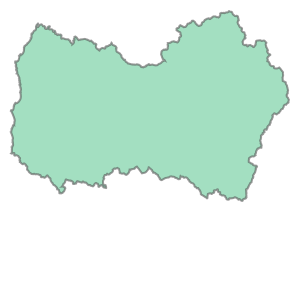

In [13]:
regions.geometry.loc[1]

In [14]:
gs.area

0    1.066060e+08
1    1.634521e+10
dtype: float64

In [15]:
gs.bounds

,minx,miny,maxx,maxy
0,-599322.7019,6.195312e+06,-407295.6503,6.237546e+06
1,219775.8022,6.125390e+06,407237.4753,6.253480e+06


In [16]:
gs.total_bounds

array([-599322.7019, 6125389.8437,  407237.4753, 6253480.0787])

In [17]:
gs.length

0    143877.052306
1    803163.596453
dtype: float64

In [18]:
gs.geom_type

0    MultiPolygon
1         Polygon
dtype: object

In [19]:
regions.geometry.loc[12:14].is_valid

12     True
13     True
14    False
dtype: bool

In [20]:
gs.centroid

0    POINT (-508178.596 6216162.562)
1     POINT (311941.053 6187603.863)
dtype: geometry

#### Basic Methods

In [21]:
gs.distance(airports.geometry.loc[0:2])

0    1.175116e+07
1    1.481657e+07
2             NaN
dtype: float64

In [22]:
gs.representative_point()

0    POINT (-412400.543 6232898.905)
1     POINT (312771.841 6189421.162)
dtype: geometry

In [23]:
gs.to_crs(4326)

0    MULTIPOLYGON (((-80.78822 -33.72046, -80.78818...
1    POLYGON ((-70.42742 -33.85486, -70.42699 -33.8...
Name: geometry, dtype: geometry

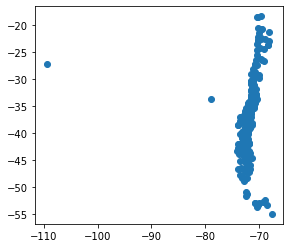

In [24]:
airports.to_crs(4326).plot()

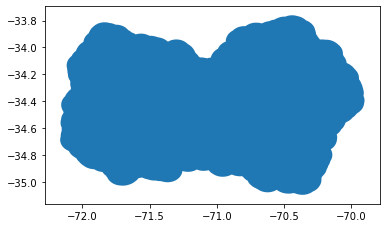

In [25]:
regions.loc[[1]].buffer(10000).to_crs(4326).plot()

#### Excercise

* Plot region \#2 rotated by 90 degrees.

#### Relationship Tests

In [26]:
regions.loc[regions.to_crs(3857).contains(airports.loc[airports.cod_oaci == "SCIR"].iloc[0].geometry)]

,NOM_REG,NOM_PROV,COD_COM,NOM_COM,COD_REGI,SUPERFICIE,POBLAC02,POBL2010,SHAPE_Leng,SHAPE_Area,geometry
0,Región de Valparaíso,Valparaíso,None,Juan Fernández,5.0,16396.1,1539852,1759167,143877.052306,1.066060e+08,"MULTIPOLYGON (((-595126.916 6205761.221, -5951..."


### GeoDataFrame

A `GeoDataFrame` is a tabular data structure that contains a `GeoSeries`.

The most important property of a `GeoDataFrame` is that it always has one `GeoSeries` column that holds a special status. This `GeoSeries` is referred to as the `GeoDataFrame`’s “geometry”. When a spatial method is applied to a GeoDataFrame (or a spatial attribute like area is called), this commands will always act on the “geometry” column.


In [27]:
regions.head()

,NOM_REG,NOM_PROV,COD_COM,NOM_COM,COD_REGI,SUPERFICIE,POBLAC02,POBL2010,SHAPE_Leng,SHAPE_Area,geometry
0,Región de Valparaíso,Valparaíso,None,Juan Fernández,5.0,16396.1,1539852,1759167,1.438771e+05,1.066060e+08,"MULTIPOLYGON (((-595126.916 6205761.221, -5951..."
1,Región del Libertador Bernardo O'Higgins,Cachapoal,06109,Malloa,6.0,16387.0,780627,883368,8.031636e+05,1.634521e+10,"POLYGON ((367952.215 6253020.696, 367992.077 6..."
2,Región de Los Lagos,Chiloe,10201,Castro,10.0,48583.6,716739,836256,5.938742e+06,4.843844e+10,"MULTIPOLYGON (((276798.602 5170548.960, 276849..."
3,Región de Atacama,Copiapó,03102,Caldera,3.0,75176.2,254336,280543,2.006822e+06,7.565203e+10,"MULTIPOLYGON (((543870.180 7201599.591, 544354..."
4,Región Metropolitana de Santiago,Cordillera,13201,Puente Alto,13.0,15403.2,6061185,6883563,8.853406e+05,1.538929e+10,"POLYGON ((338154.274 6355570.954, 338188.688 6..."


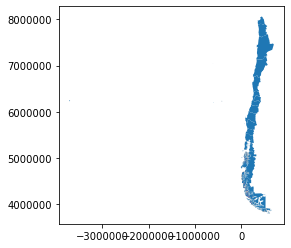

In [28]:
regions.plot()

In [29]:
regions.geometry.name

'geometry'

In [30]:
regions = regions.rename(columns={"geometry": "new_geometry"}).set_geometry("new_geometry")
regions.geometry.name

'new_geometry'

In [31]:
regions["region_centroid"] = regions.centroid

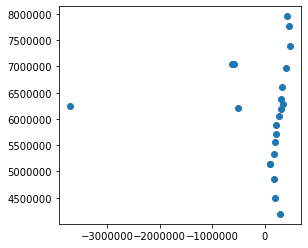

In [32]:
regions.set_geometry("region_centroid").plot()

If you wish to call a column named `“geometry”`, and a different column is the active geometry column, use `gdf['geometry']`, not `gdf.geometry`.

Any of the attributes calls or methods described for a `GeoSeries` will work on a `GeoDataFrame` – effectively, they are just applied to the “geometry” `GeoSeries`.

In [33]:
regions.head().area

0    1.066060e+08
1    1.634521e+10
2    4.843844e+10
3    7.565203e+10
4    1.538929e+10
dtype: float64

#### Excercise

* add new geometry column to `airports` GeoDataFrame, call it `buffer_geometry` and fill it with `airports.buffer(1000000)` values
* set this new column as default
* plot GeoDataFrame

## Indexing and Selecting Data

GeoPandas inherits the standard pandas methods for indexing/selecting data. This includes label based indexing with `.loc` and integer position based indexing with `.iloc`, which apply to both `GeoSeries` and `GeoDataFrame` objects.

In addition to the standard pandas methods, GeoPandas also provides coordinate based indexing with the `cx` indexer, which slices using a bounding box. Geometries in the `GeoSeries` or `GeoDataFrame` that intersect the bounding box will be returned.

In [34]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

In [35]:
northern = world.to_crs(4326).cx[:, 0:]

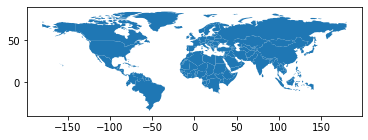

In [36]:
northern.plot()

#### Excercise

* Plot Southern Hemisphere

## Making Maps

GeoPandas provides a high-level interface to the `matplotlib` library for making maps.

In [37]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

In [38]:
cities = gp.read_file(gp.datasets.get_path('naturalearth_cities'))

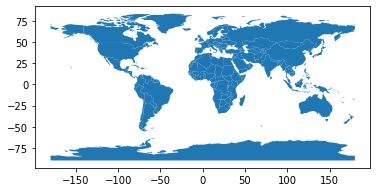

In [39]:
world.plot()

### Choropleth Maps

GeoPandas makes it easy to create Choropleth maps (maps where the color of each shape is based on the value of an associated variable). Simply use the plot command with the `column` argument set to the column whose values you want used to assign colors.

In [40]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

In [41]:
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

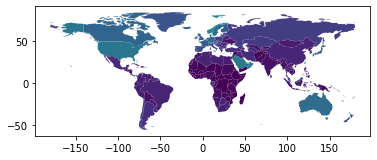

In [42]:
world.plot(column='gdp_per_cap');

#### Creating a legend

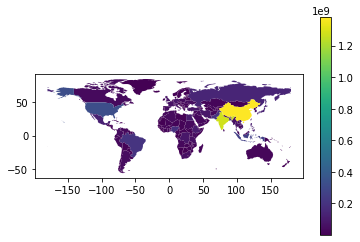

In [43]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
world.plot(column='pop_est', ax=ax, legend=True)

However, the default appearance of the legend and plot axes may not be desirable.

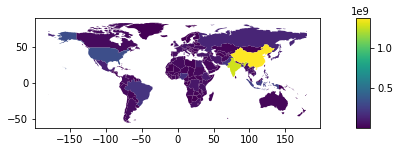

In [44]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
world.plot(column='pop_est', ax=ax, legend=True, cax=cax)

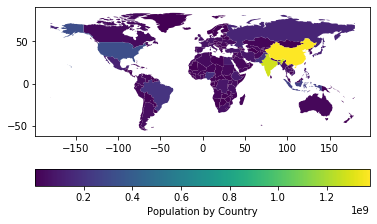

In [45]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
world.plot(column='pop_est',
           ax=ax,
           legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})

#### Choosing colors

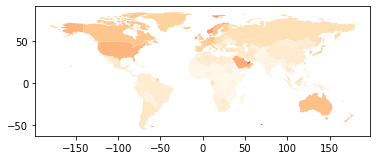

In [46]:
world.plot(column='gdp_per_cap', cmap='OrRd')

The way color maps are scaled can also be manipulated with the `scheme` option:

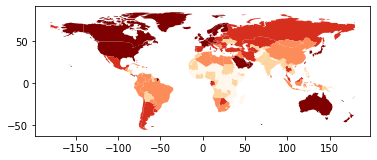

In [47]:
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles');

### Maps with Layers

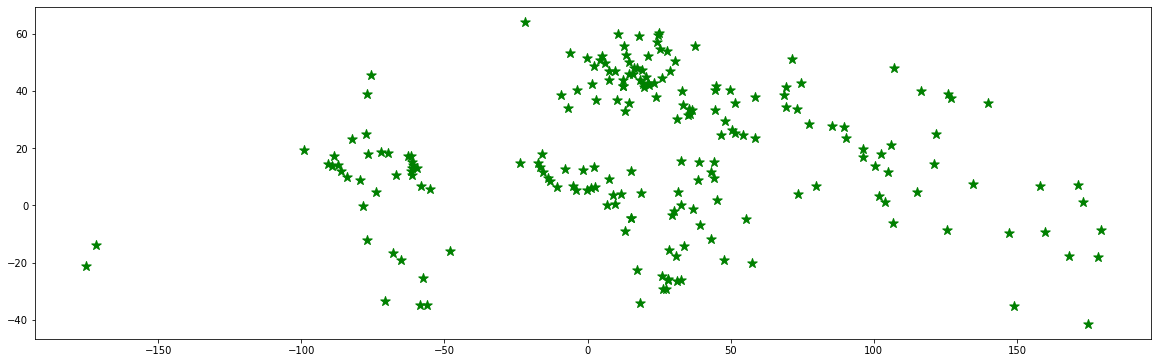

In [48]:
cities.plot(marker='*', color='green', markersize=100, figsize=(20, 20));

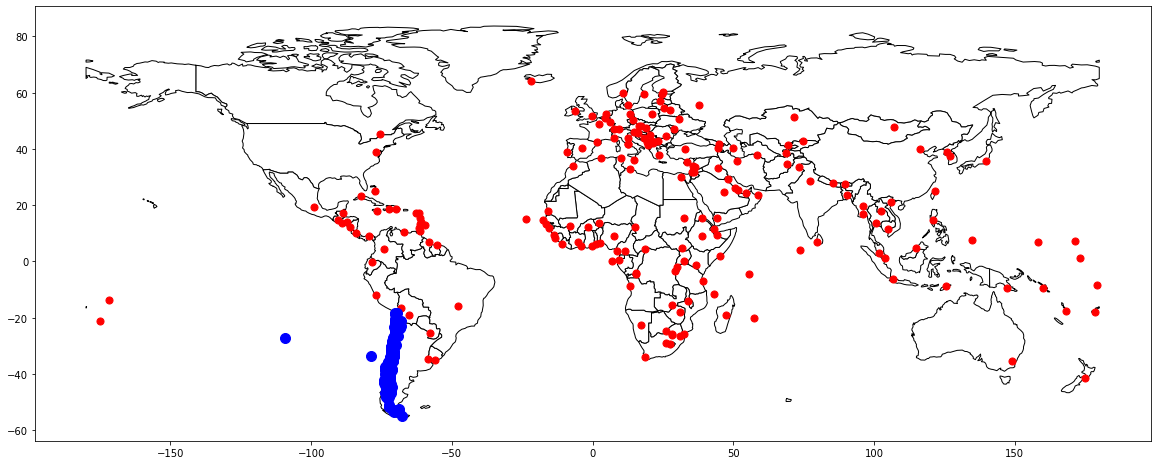

In [49]:
base = world.plot(color='white', edgecolor='black', figsize=(20, 20))
cities.plot(ax=base, marker='o', color='red', markersize=50);
airports.set_geometry("geometry").to_crs(world.crs).plot(ax=base, marker='o', color='blue', markersize=100);

#### Excercise

* Plot `regions` GeoDataFrame atop of `base`

## Choropleth classification schemes from PySAL for use with GeoPandas

[PySAL](https://pysal.readthedocs.io/en/latest/) is a Spatial Analysis Library, which packages fast spatial algorithms used in various fields. These include Exploratory spatial data analysis, spatial inequality analysis, spatial analysis on networks, spatial dynamics, and many more.

For example, if we have 20 countries whose average annual temperature varies between 5C and 25C, we can classify them in 4 bins by:

* Quantiles
  * Separates the rows into equal parts, 5 countries per bin.
* Equal Intervals
  * Separates the measure's interval into equal parts, 5C per bin.
* Natural Breaks (Fischer Jenks)
  * This algorithm tries to split the rows into naturaly occurring clusters. The numbers per bin will depend on how the observations are located on the interval.

In [50]:
import matplotlib.pyplot as plt
import pysal as ps

In [51]:
pth = ps.lib.examples.get_path("columbus.shp")
tracts = gp.GeoDataFrame.from_file(pth)
tracts.head()

,AREA,PERIMETER,COLUMBUS_,COLUMBUS_I,POLYID,NEIG,HOVAL,INC,CRIME,OPEN,...,DISCBD,X,Y,NSA,NSB,EW,CP,THOUS,NEIGNO,geometry
0,0.309441,2.440629,2,5,1,5,80.467003,19.531,15.725980,2.850747,...,5.03,38.799999,44.070000,1.0,1.0,1.0,0.0,1000.0,1005.0,"POLYGON ((8.62413 14.23698, 8.55970 14.74245, ..."
1,0.259329,2.236939,3,1,2,1,44.567001,21.232,18.801754,5.296720,...,4.27,35.619999,42.380001,1.0,1.0,0.0,0.0,1000.0,1001.0,"POLYGON ((8.25279 14.23694, 8.28276 14.22994, ..."
2,0.192468,2.187547,4,6,3,6,26.350000,15.956,30.626781,4.534649,...,3.89,39.820000,41.180000,1.0,1.0,1.0,0.0,1000.0,1006.0,"POLYGON ((8.65331 14.00809, 8.81814 14.00205, ..."
3,0.083841,1.427635,5,2,4,2,33.200001,4.477,32.387760,0.394427,...,3.70,36.500000,40.520000,1.0,1.0,0.0,0.0,1000.0,1002.0,"POLYGON ((8.45950 13.82035, 8.47341 13.83227, ..."
4,0.488888,2.997133,6,7,5,7,23.225000,11.252,50.731510,0.405664,...,2.83,40.009998,38.000000,1.0,1.0,1.0,0.0,1000.0,1007.0,"POLYGON ((8.68527 13.63952, 8.67758 13.72221, ..."


### Plotting the CRIME variable

In this example, we are taking a look at neighbourhood-level statistics for the city of Columbus, OH. We'd like to have an idea of how the crime rate variable is distributed around the city.

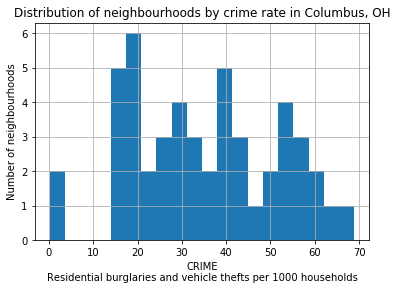

In [52]:
tracts['CRIME'].hist(bins=20)
plt.xlabel('CRIME\nResidential burglaries and vehicle thefts per 1000 households')
plt.ylabel('Number of neighbourhoods')
plt.title('Distribution of neighbourhoods by crime rate in Columbus, OH')
plt.show()

Now let's see what it looks like without a classification scheme:

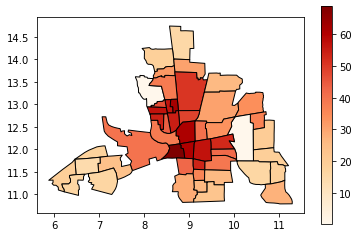

In [53]:
tracts.plot(column='CRIME', cmap='OrRd', edgecolor='k', legend=True)

All the 49 neighbourhoods are colored along a white-to-dark-red gradient, but the human eye can have a hard time comparing the color of shapes that are distant one to the other. In this case, it is especially hard to rank the peripheral districts colored in beige.

Instead, we'll classify them in color bins.

### Classification by quantiles

QUANTILES will create attractive maps that place an equal number of observations in each class: If you have 30 counties and 6 data classes, you’ll have 5 counties in each class. The problem with quantiles is that you can end up with classes that have very different numerical ranges (e.g., 1-4, 4-9, 9-250).

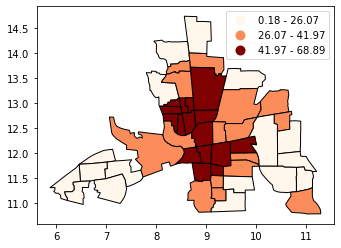

In [54]:
# Splitting the data in three shows some spatial clustering around the center
tracts.plot(column='CRIME', scheme='quantiles', k=3, cmap='OrRd', edgecolor='k', legend=True)

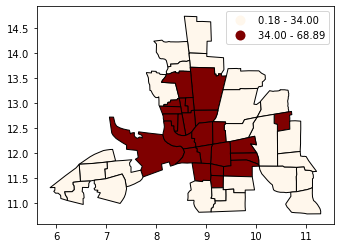

In [55]:
# We can also see where the top and bottom halves are locate
tracts.plot(column='CRIME', scheme='quantiles', k=2, cmap='OrRd', edgecolor='k', legend=True)

### Classification by equal intervals

EQUAL INTERVAL divides the data into equal size classes (e.g., 0-10, 10-20, 20-30, etc.) and works best on data that is generally spread across the entire range. CAUTION: Avoid equal interval if your data are skewed to one end or if you have one or two really large outlier values.

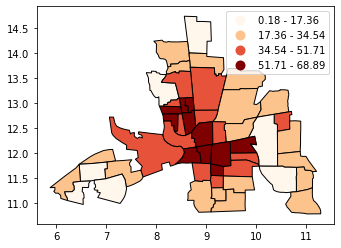

In [56]:
tracts.plot(column='CRIME', scheme='equal_interval', k=4, cmap='OrRd', edgecolor='k', legend=True)

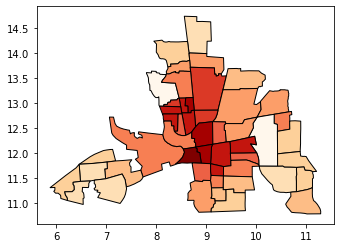

In [57]:
# No legend here as we'd be out of space
tracts.plot(column='CRIME', scheme='equal_interval', k=12, cmap='OrRd', edgecolor='k')

### Classificaton by natural breaks

NATURAL BREAKS is a kind of “optimal” classification scheme that finds class breaks that will minimize within-class variance and maximize between-class differences. One drawback of this approach is each dataset generates a unique classification solution, and if you need to make comparison across maps, such as in an atlas or a series (e.g., one map each for 1980, 1990, 2000) you might want to use a single scheme that can be applied across all of the maps.

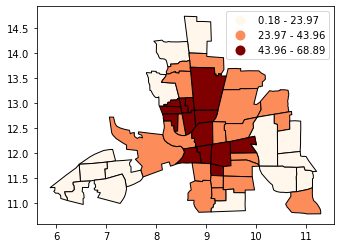

In [58]:
# Compare this to the previous 3-bin figure with quantiles
tracts.plot(column='CRIME', scheme='fisher_jenks', k=3, cmap='OrRd', edgecolor='k', legend=True)

### Other classification schemes in PySAL

Geopandas includes only the most used classifiers found in PySAL. In order to use the others, you will need to add them as additional columns to your GeoDataFrame.

## Managing Projections

In [59]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

In [60]:
world.crs

{'init': 'epsg:4326'}

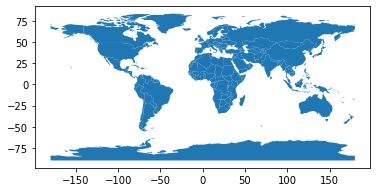

In [61]:
world.plot()

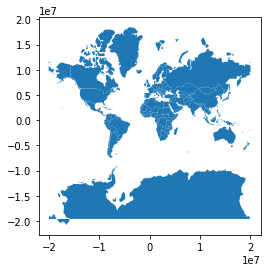

In [62]:
world.to_crs(3857).plot()

#### Excercise

* What will be plotted?

```
world.crs = 3857
world.to_crs(3857).plot()
```

## Spatial Overlay Analysis

Spatial overlays allow you to compare two GeoDataFrames containing polygon or multipolygon geometries and create a new GeoDataFrame with the new geometries representing the spatial combination and *merged* properties.

The basic idea is demonstrated by the graphic below but keep in mind that overlays operate at the dataframe level, not on individual geometries, and the properties from both are retained

![overlay_operations](http://docs.qgis.org/testing/en/_images/overlay_operations.png)

In [63]:
from shapely.geometry import Point
from geopandas import datasets, GeoDataFrame, read_file
from geopandas.tools import overlay

# NYC Boros
polydf = read_file(datasets.get_path('nybb'))

# Generate some circles
b = [int(x) for x in polydf.total_bounds]
N = 10
polydf2 = GeoDataFrame([
    {'geometry': Point(x, y).buffer(10000), 'value1': x + y, 'value2': x - y}
    for x, y in zip(range(b[0], b[2], int((b[2] - b[0]) / N)),
                    range(b[1], b[3], int((b[3] - b[1]) / N)))])

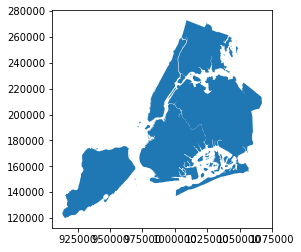

In [64]:
polydf.plot()

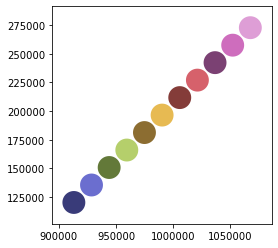

In [65]:
polydf2.plot(cmap='tab20b')

The geopandas.tools.overlay function takes three arguments:

* df1
* df2
* how

Where `how` can be one of:

* intersection
* union
* identity
* symmetric_difference
* difference

So let's identify the areas (and attributes) where both dataframes intersect using the overlay tool.

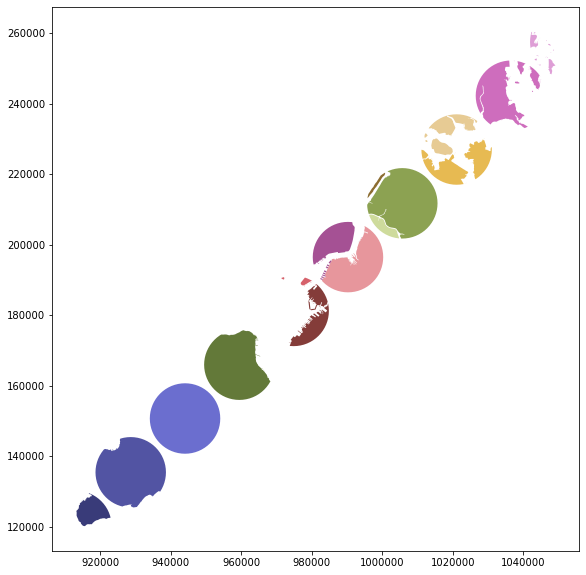

In [66]:
from geopandas.tools import overlay
newdf = overlay(polydf, polydf2, how="intersection")
newdf.plot(cmap='tab20b', figsize=(10, 10))

#### Exercise

* Make GeoDataFrame with `difference`.
* Make sure that the properties from both frames are retained 

## Aggregation with dissolve

Spatial data are often more granular than we need. For example, we might have data on sub-national units, but we’re actually interested in studying patterns at the level of countries.

In a non-spatial setting, when all we need are summary statistics of the data, we aggregate our data using the `groupby` function. But for spatial data, we sometimes also need to aggregate geometric features. In the geopandas library, we can aggregate geometric features using the `dissolve` function.

`dissolve` can be thought of as doing three things: (a) it dissolves all the geometries within a given group together into a single geometric feature (using the `unary_union method`), and (b) it aggregates all the rows of data in a group using `groupby.aggregate()`, and (c) it combines those two results.

Suppose we are interested in studying continents, but we only have country-level data like the country dataset included in GeoPandas. We can easily convert this to a continent-level dataset.

First, let’s look at the most simple case where we just want continent shapes and names. By default, `dissolve` will pass `'first'` to `groupby.aggregate`.

,geometry
continent,
Africa,"MULTIPOLYGON (((49.544 -12.470, 49.809 -12.895..."
Antarctica,"MULTIPOLYGON (((-163.713 -78.596, -163.713 -78..."
Asia,"MULTIPOLYGON (((120.295 -10.259, 118.968 -9.55..."
Europe,"MULTIPOLYGON (((-51.658 4.156, -52.249 3.241, ..."
North America,"MULTIPOLYGON (((-61.680 10.760, -61.105 10.890..."
Oceania,"MULTIPOLYGON (((169.668 -43.555, 170.525 -43.0..."
Seven seas (open ocean),"POLYGON ((68.935 -48.625, 69.580 -48.940, 70.5..."
South America,"MULTIPOLYGON (((-66.960 -54.897, -67.291 -55.3..."


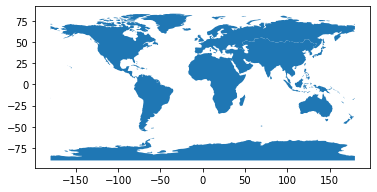

In [67]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
world = world[['continent', 'geometry']]
continents = world.dissolve(by='continent')
continents.plot()
continents

If we are interested in aggregate populations, however, we can pass different functions to the `dissolve` method to aggregate populations using the `aggfunc =` argument:

,geometry,pop_est
continent,,
Africa,"MULTIPOLYGON (((49.544 -12.470, 49.809 -12.895...",1219176238
Antarctica,"MULTIPOLYGON (((-163.713 -78.596, -163.713 -78...",4050
Asia,"MULTIPOLYGON (((120.295 -10.259, 118.968 -9.55...",4389144868
Europe,"MULTIPOLYGON (((-51.658 4.156, -52.249 3.241, ...",746398461
North America,"MULTIPOLYGON (((-61.680 10.760, -61.105 10.890...",573042112
Oceania,"MULTIPOLYGON (((169.668 -43.555, 170.525 -43.0...",36782844
Seven seas (open ocean),"POLYGON ((68.935 -48.625, 69.580 -48.940, 70.5...",140
South America,"MULTIPOLYGON (((-66.960 -54.897, -67.291 -55.3...",418540749


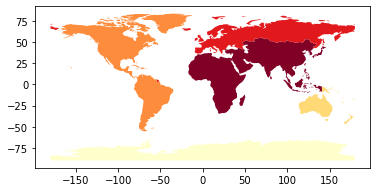

In [68]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
world = world[['continent', 'geometry', 'pop_est']]
continents = world.dissolve(by='continent', aggfunc='sum')
continents.plot(column = 'pop_est', scheme='quantiles', cmap='YlOrRd')
continents

#### Exercise

* Perform dissolve with different `aggfunc` values (`first`, `last`, `min`, `max`, `sum`, `mean`, `median`).
* How to dissolve all geometries in GeoDataFrame?

In [69]:
regions['geom_type'] = regions.geometry.geom_type

## Merging Data

There are two ways to combine datasets in geopandas – **attribute** joins and **spatial** joins.

In an attribute join, a `GeoSeries` or `GeoDataFrame` is combined with a regular pandas `Series` or `DataFrame` based on a common variable. This is analogous to normal merging or joining in pandas.

In a Spatial Join, observations from to `GeoSeries` or `GeoDataFrames` are combined based on their spatial relationship to one another.

In the following examples, we use these datasets:

In [70]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
cities = gp.read_file(gp.datasets.get_path('naturalearth_cities'))

# For attribute join
country_shapes = world[['geometry', 'iso_a3']]
country_names = world[['name', 'iso_a3']]

# For spatial join
countries = world[['geometry', 'name']]
countries = countries.rename(columns={'name':'country'})

### Attribute Joins

In [71]:
country_shapes.head()

,geometry,iso_a3
0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJI
1,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TZA
2,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",ESH
3,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN
4,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA


In [72]:
country_names.head()

,name,iso_a3
0,Fiji,FJI
1,Tanzania,TZA
2,W. Sahara,ESH
3,Canada,CAN
4,United States of America,USA


In [73]:
merged = country_shapes.merge(country_names, on='iso_a3')
merged

,geometry,iso_a3,name
0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJI,Fiji
1,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TZA,Tanzania
2,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",ESH,W. Sahara
3,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN,Canada
4,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA,United States of America
...,...,...,...
192,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",MKD,Macedonia
193,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",SRB,Serbia
194,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",MNE,Montenegro
195,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",TTO,Trinidad and Tobago


### Spatial Joins

`sjoin.()` has two core arguments: `how` and `op`.

**op**

* intersects
* within
* contains

**how**

* left
* right
* inner

In [74]:
cities

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)
...,...,...
197,Cairo,POINT (31.24802 30.05191)
198,Tokyo,POINT (139.74946 35.68696)
199,Paris,POINT (2.33139 48.86864)
200,Santiago,POINT (-70.66899 -33.44807)


In [75]:
joined = gp.sjoin(cities, countries, op="within")
joined.head()

,name,geometry,index_right,country
0,Vatican City,POINT (12.45339 41.90328),141,Italy
1,San Marino,POINT (12.44177 43.93610),141,Italy
192,Rome,POINT (12.48131 41.89790),141,Italy
2,Vaduz,POINT (9.51667 47.13372),114,Austria
184,Vienna,POINT (16.36469 48.20196),114,Austria


#### Excercise

* From clear `regions` GeoDataFrame create new one with columns `geometry`, `NOM_PROV`
* From clear `airports` GeoDataFrame create new one with columns `geometry`, `Aerodromo`
* For each airport determine province name
* For each province calculate the number of airports